# Dashboard IBIO

## Definición de Rutas y Variables Importantes

La siguiente celda contiene las rutas de los archivos y algunas variables esenciales (como el período actual y el programa principal) necesarias para graficar los datos. **Esta celda debe ejecutarse antes que las demás**.


In [1]:
# Escriba el periodo actual o el periodo hasta el cual quiere calcular las estadísticas. Ej: "201810"
periodo_actual = "202510"

# Escriba el programa principal para el cual quiere calcular las estadísticas. Ej: "INGENIERIA BIOMEDICA"
programa_principal = "INGENIERIA BIOMEDICA"

# Ruta al archivo de datos de los cursos
cursos_excelPath = f"Data/Cursos 201810-{periodo_actual}.xlsx"
# Ruta al archivo de datos de los estudiantes
estudiantes_excelPath = f"Data/Estudiantes IBIO 201810-{periodo_actual}.xlsx"
# Ruta al archivo de datos de los sancionados
sancionados_excelPath = "Data/Estudiantes Sancionados 2021-10.xlsx"
# Ruta al archivo de datos de los estudiantes que se retiraron
path_retiros = "Data/Retiros 201810-202420.xlsx"
# Ruta al archivo de la población de estudiantes IBIO
poblacion_IBIO = "Data/EstudiantesUnicosTotales.xlsx" 

## PieCharts por Materia para cada Periodo

La siguiente celda permite generar pie-charts por materia, mostrando el avance de cada estudiante en cada período. Es crucial especificar la ruta donde se desea guardar estos resultados antes de ejecutar la celda.

In [2]:
from dashboard import mainMaterias

#Nombre de la carpeta donde queremos que se guarden los resultados
directory_name = f'RESULTS_{periodo_actual}/PieCharts_por_Materia' 

mainMaterias(cursos_excelPath, programa_principal, directory_name)

Procesando periodos académicos: 100%|██████████| 15/15 [00:17<00:00,  1.19s/it]


## PieCharts por Cohorte

La siguiente celda permite generar pie charts por cohorte, calculando el avance de cada generación de estudiantes que ingresaron al programa de Ingeniería Biomédica. Al igual que en otros casos, es fundamental especificar la ruta donde se desean guardar estos resultados antes de ejecutar la celda.

In [3]:
from dashboard import avance_cohortes

#Nombre de la carpeta donde queremos que se guarden los resultados
directory_name = f"RESULTS_{periodo_actual}/PieCharts_por_cohorte"

mean_dataframe, desv_dataframe, results, mean_sancionados, desv_sancionados, sancionados_dict = avance_cohortes(cursos_excelPath, sancionados_excelPath, programa_principal, directory_name)

Procesando periodos académicos: 100%|██████████| 15/15 [03:52<00:00, 15.51s/it]


## Estadísticas históricas por semestre

La siguiente celda genera gráficos que muestran el avance de cada cohorte en comparación con el promedio histórico. Esto permite evaluar el progreso de los estudiantes que ingresaron en un semestre particular en relación con todos los estudiantes del programa IBIO. La celda produce gráficos para cada uno de los períodos y un gráfico general que incluye las líneas de todas las cohortes, facilitando un análisis comparativo más directo.

In [4]:
from dashboard import avance_cohortes, historico_cohortes, plot_historico_cohortes

#Nombre de la carpeta donde queremos que se guarden los resultados
directory_name = f"RESULTS_{periodo_actual}/Historico_cohortes"

mean_dataframe, desv_dataframe, results, mean_sancionados, desv_sancionados, sancionados_dict = avance_cohortes(cursos_excelPath, sancionados_excelPath, programa_principal)
mean_avance_hist = historico_cohortes(cursos_excelPath, sancionados_excelPath, programa_principal)
plot_historico_cohortes(cursos_excelPath, sancionados_excelPath, mean_dataframe, desv_dataframe, mean_avance_hist, directory_name, programa_principal)

Procesando periodos académicos: 100%|██████████| 15/15 [00:00<00:00, 20.24it/s]


## Número de estudiantes por Cohorte

La siguiente celda permite generar gráficos que muestran la evolución del número de estudiantes de cada cohorte a lo largo del tiempo. La celda produce gráficos específicos para cada cohorte y un gráfico general que incluye la evolución del número de estudiantes para todas las cohortes, proporcionando una visión integral del cambio en la cantidad de estudiantes matriculados a través del tiempo.

In [5]:
from dashboard import n_estudiantes, plot_n_cohortes

#Nombre de la carpeta donde queremos que se guarden los resultados
directory_name = f"RESULTS_{periodo_actual}/N_cohortes"

n_dataframe, mean_n_hist, n_sancionados = n_estudiantes(cursos_excelPath, sancionados_excelPath, estudiantes_excelPath, programa_principal)
plot_n_cohortes(cursos_excelPath, n_dataframe, mean_n_hist, directory_name, programa_principal)

## Avance conjunto con número de estudiantes

La siguiente celda genera gráficos combinados que describen el número de estudiantes, el avance de cada materia, y el avance promedio de las materias agrupadas por niveles.

In [6]:
from dashboard import avanceNivel

#Nombre de la carpeta donde queremos que se guarden los resultados
directory_name = f'RESULTS_{periodo_actual}/Resultados_por_Materia'

avanceNivel(cursos_excelPath, programa_principal, directory_name)

Creando gráficas: 100%|██████████| 13/13 [00:01<00:00, 10.88it/s]


## Retiros

La siguiente celda permite generar gráficos similares a los obtenidos en la celda anterior, pero que incorporan información sobre la cantidad de estudiantes que retiraron cada materia en cada semestre. Esto facilita un análisis temporal de los retiros mientras se examina el avance académico

In [7]:
from dashboard import Retiros

#Nombre de la carpeta donde queremos que se guarden los resultados
directory_name = f'RESULTS_{periodo_actual}/Resultados_por_Materia'

Retiros(path_retiros, cursos_excelPath, programa_principal, directory_name)

## Sancionados

La siguiente celda permite obtener estadísticas sobre los estudiantes sancionados en 2021-1. Entre los gráficos generados se incluyen el avance de estos estudiantes a lo largo de los semestres y la evolución en su número.

In [8]:
from dashboard import sancionados

#Nombre de la carpeta donde queremos que se guarden los resultados
directory_name = f"RESULTS_{periodo_actual}/Sancionados"

sancionados(cursos_excelPath, directory_name, programa_principal, sancionados_excelPath)

Procesando periodos académicos: 100%|██████████| 15/15 [00:00<00:00, 20.34it/s]


## Gráficas Generales

La siguiente celda genera gráficos que resumen las principales estadísticas encontradas, permitiendo evaluar tendencias a lo largo del tiempo para tomar decisiones informadas. Entre estos gráficos se incluyen la evolución del número de estudiantes IBIO y el número total de estudiantes de IBIO, considerando el avance en las materias a lo largo de los semestres.

Procesando periodos académicos: 100%|██████████| 15/15 [00:00<00:00, 20.70it/s]


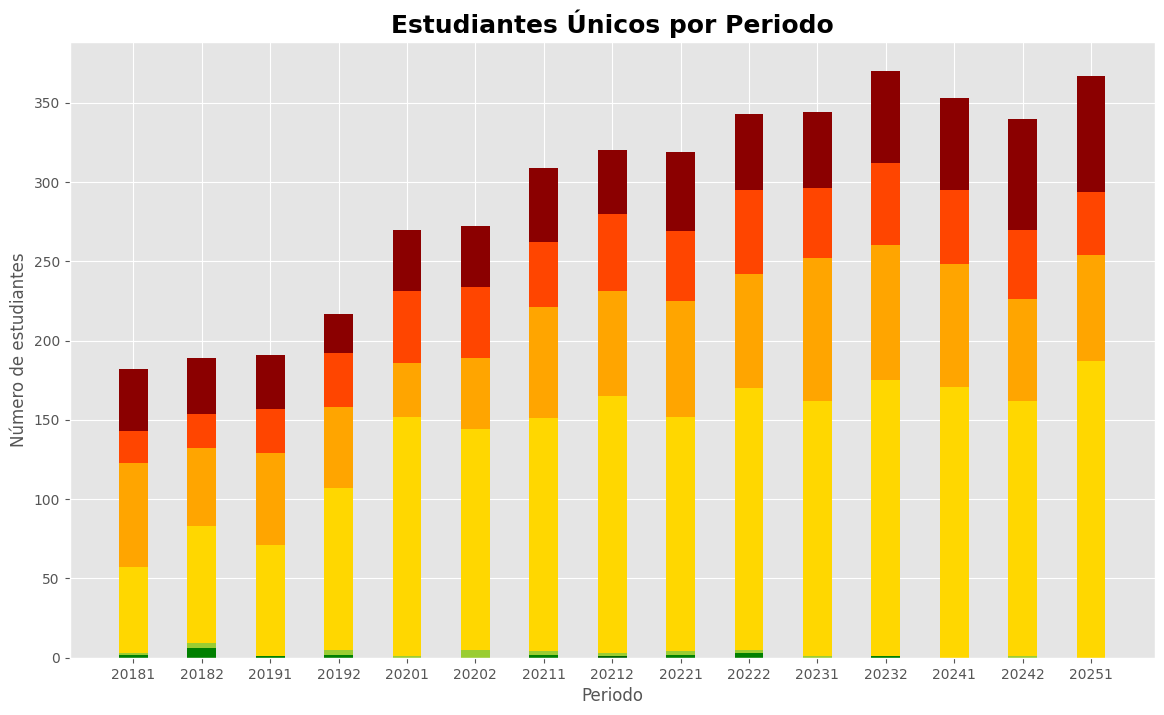

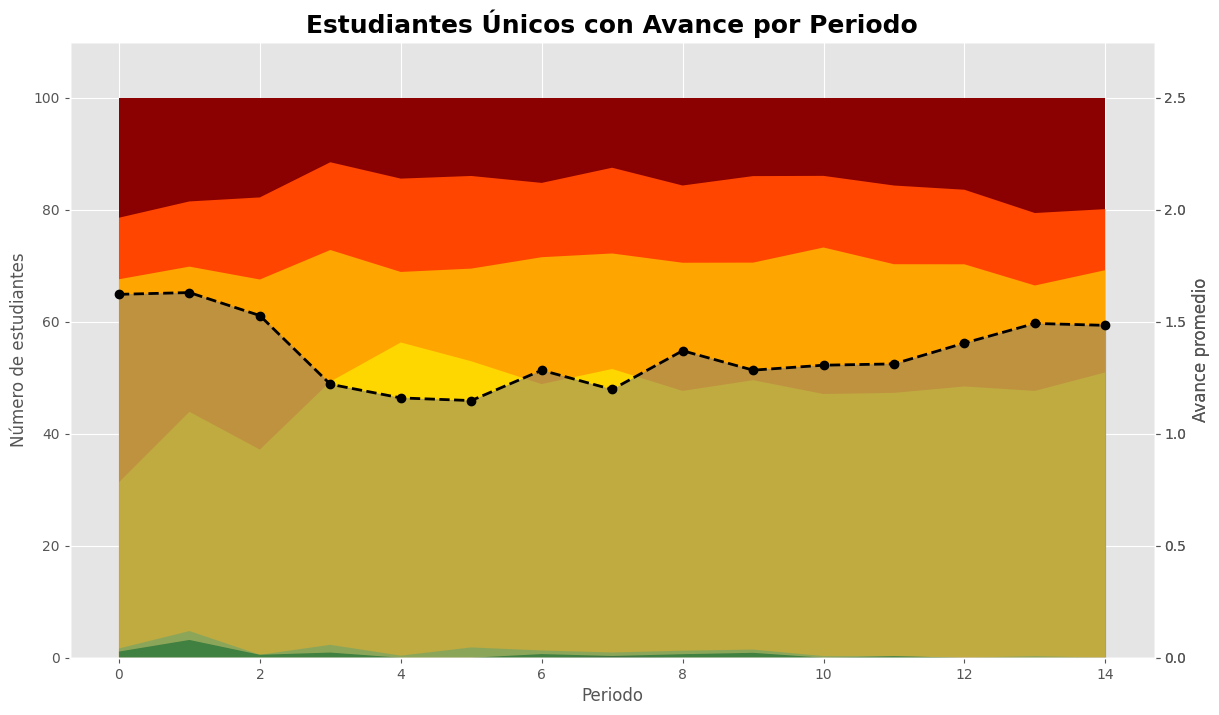

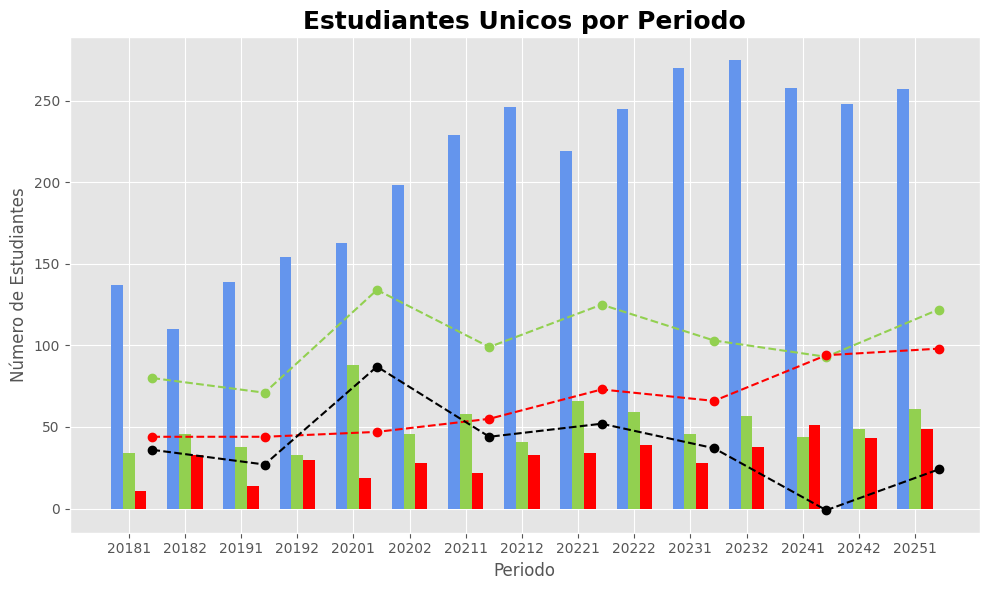

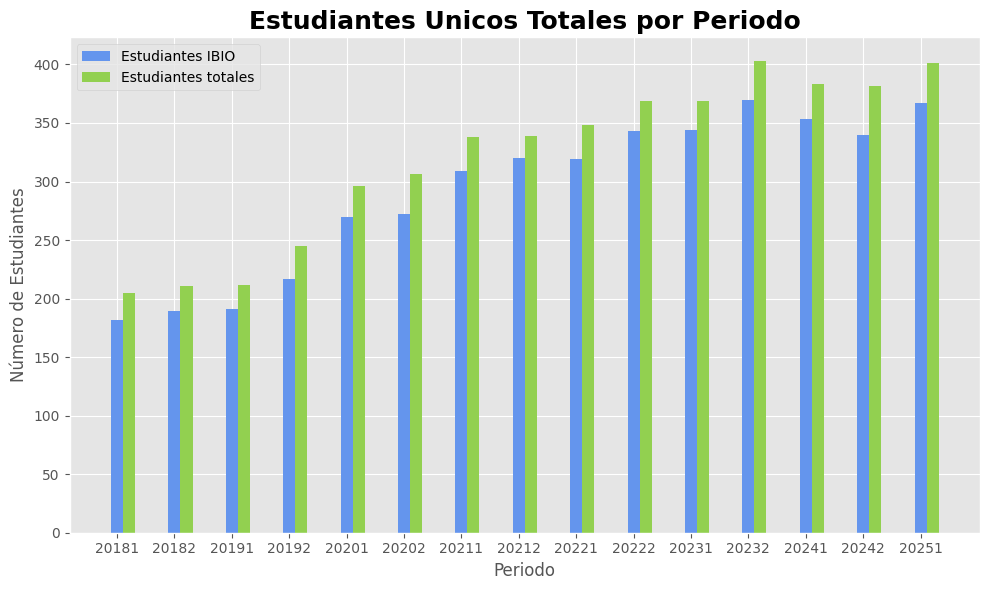

In [10]:
from dashboard import general_plots, historico_cohortes, n_estudiantes, estudiantesUnicosConAvance, PoblacionEstudiantesUnicos, estudiantesUnicosPorPeriodo

directory_name = f"RESULTS_{periodo_actual}/Graficas_Generales"

#Nombre de la carpeta donde queremos que se guarden los resultados
mean_avance_hist = historico_cohortes(cursos_excelPath, sancionados_excelPath, programa_principal)
n_dataframe, mean_n_hist, n_sancionados = n_estudiantes(cursos_excelPath, sancionados_excelPath, estudiantes_excelPath, programa_principal)

general_plots(estudiantes_excelPath, mean_avance_hist, mean_n_hist, directory_name)
estudiantesUnicosPorPeriodo(cursos_excelPath, programa_principal, directory_name)
PoblacionEstudiantesUnicos(cursos_excelPath, programa_principal, directory_name)